# **Capstone Project Modul 2: RFM Analysis of Supermarket's Customers**
# **JCDS 0406 - Ahmad Husaini**

**Background:**

In the dynamic and competitive landscape of the retail industry, supermarkets are constantly seeking ways to enhance customer satisfaction and loyalty. One effective method for understanding and segmenting customers is through Recency, Frequency, and Monetary (RFM) analysis. RFM analysis is a data-driven approach that evaluates customer behavior based on three key metrics:

1. Recency (R): How recently did the customer make a purchase?
2. Frequency (F): How often does the customer make purchases?
3. Monetary Value (M): What is the total monetary value of the customer's purchases?

By leveraging RFM analysis, supermarket can gain valuable insights into customer segments, enabling targeted marketing strategies, personalized promotions, and improved overall customer experiences. Understanding the nuances of customer behavior through RFM analysis can contribute significantly to the supermarket's efforts in customer retention and revenue growth.


**Stakeholder:**

Marketing and Business Development Dept


**Research Questions:**

1. **What is the distribution of recency, frequency, and monetary values among our supermarket customers?**
   - This question aims to provide an overview of the basic characteristics of customer behavior in terms of how recently they made purchases, how often they shop, and the total monetary value of their transactions.

2. **How do different customer segments emerge based on RFM analysis, and what are their distinguishing characteristics?**
   - This question seeks to identify and define distinct customer segments that may arise from the RFM analysis. Understanding these segments will help in tailoring marketing strategies and services to meet the specific needs of each group.

3. **How can the findings from RFM analysis inform personalized marketing campaigns for different customer segments?**
   - This question focuses on translating the insights gained from RFM analysis into actionable strategies. It explores how supermarkets can use the identified customer segments to design targeted and personalized marketing campaigns that resonate with each group.

By addressing these research questions, the study can provide a comprehensive understanding of customer behavior in the context of a supermarket, offering practical implications for marketing strategies and business growth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import shapiro, chi2_contingency, kruskal
import warnings 
warnings.filterwarnings('ignore')

In [2]:
supermarket = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
supermarket

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Understanding and Cleaning
Before we analyze, we should known our dataset condition to have better data understanding. From this stage, we will know anomalies that exist inside our dataset and we need take care that anomalies in data wrangling and cleaning process. All things that we have done with these anomalies will be have explanations from domain knowledge or statistic wise. 

First, we let's see general information about this dataset.

| Category          | Field               | Description                                              |
|-------------------|---------------------|----------------------------------------------------------|
| **People**        | ID                  | Customer's unique identifier                              |
|                   | Year_Birth          | Customer's birth year                                     |
|                   | Education           | Customer's education level                                |
|                   | Marital_Status      | Customer's marital status                                 |
|                   | Income              | Customer's yearly household income (Dollar)             |
|                   | Kidhome             | Number of children in customer's household               |
|                   | Teenhome            | Number of teenagers in customer's household              |
|                   | Dt_Customer         | Date of customer's enrollment with the company            |
|                   | Recency             | Number of days since customer's last purchase (Days)    |
|                   | Complain            | 1 if the customer complained in the last 2 years, 0 otherwise |


| Category          | Field               | Description                                              |
|-------------------|---------------------|----------------------------------------------------------|
| **Products**      | MntWines            | Amount spent on wine in the last 2 years (Dollar)         |
|                   | MntFruits           | Amount spent on fruits in the last 2 years (Dollar)       |
|                   | MntMeatProducts     | Amount spent on meat in the last 2 years (Dollar)        |
|                   | MntFishProducts     | Amount spent on fish in the last 2 years (Dollar)        |
|                   | MntSweetProducts    | Amount spent on sweets in the last 2 years (Dollar)      |
|                   | MntGoldProds        | Amount spent on gold in the last 2 years (Dollar)        |


| Category          | Field               | Description                                              |
|-------------------|---------------------|----------------------------------------------------------|
| **Promotion**     | NumDealsPurchases   | Number of purchases made with a discount                 |
|                   | AcceptedCmp1        | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise |
|                   | AcceptedCmp2        | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
|                   | AcceptedCmp3        | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
|                   | AcceptedCmp4        | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
|                   | AcceptedCmp5        | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
|                   | Response            | 1 if the customer accepted the offer in the last campaign, 0 otherwise |



| Category          | Field               | Description                                              |
|-------------------|---------------------|----------------------------------------------------------|
| **Place**         | NumWebPurchases     | Number of purchases made through the company’s website   |
|                   | NumCatalogPurchases | Number of purchases made using a catalog                 |
|                   | NumStorePurchases   | Number of purchases made directly in stores              |
|                   | NumWebVisitsMonth    | Number of visits to the company’s website in the last month |

In [3]:
print(f'Total data and columns in Supermarket Customers dataset is {supermarket.shape[0]} rows and {supermarket.shape[1]} columns.')
supermarket.info()

Total data and columns in Supermarket Customers dataset is 2240 rows and 29 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  Mnt

In [4]:
display(supermarket.describe(), supermarket.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


According to the information above, we can see the original dataset has 28 columns and 2240 rows. The majority of data are ready to use, except in ID and Dt_Customer column, so we will do casting on those columns.

In [5]:
# Casting Data
supermarket['ID'] = supermarket['ID'].apply(str)
supermarket['Dt_Customer']= pd.to_datetime(supermarket['Dt_Customer'],dayfirst=True)

### Unique value from every columns in Supermarket Customers Dataset

In [7]:
pd.set_option('display.max_colwidth', None)
list_unique = []
for x in supermarket.columns:
    if(x == 'Order Date'):
        list_unique.append([x, supermarket[x].nunique(), supermarket[x].apply(lambda x : x.date()).unique()])
    else:
        list_unique.append([x, supermarket[x].nunique(), supermarket[x].unique()])
unique_value = pd.DataFrame(data=list_unique,
                            columns=['Column Name', 'Number of Unique', 'Unique Value'])
unique_value

,Column Name,Number of Unique,Unique Value
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-

Based on the data, there are some columns with unique values that actually have similar meanings, so they can be classified into one class for more accurate analysis. These columns are:

- **Education**: In the education column, there is a value "2n Cycle," which, according to one [source](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles.), means a master's degree. Additionally, "basic" education refers to individuals who have only completed education up to high school (SMA) or have informal education according to the [definition of basic education](https://uis.unesco.org/en/glossary-term/basic-education). Therefore, we will create a new column called 'Education_Level,' where "2n Cycle" will be grouped as master's, and "basic" will be identified as high school (to make it more understandable for the general audience). Also, the education level "graduation" will be replaced with "undergraduate" to avoid confusion.

- **Marital_Status**: In this column, there are some terms like "absurd" and "yolo" that are unclear and do not fit into the classification of marital status. However, we can assume that individuals who filled in these marital statuses are actually single because if they had a partner, they could use "together" or "married." Additionally, the statuses "single" and "alone" essentially mean the same thing, as do "divorced" and "widow," both indicating a separation. To streamline the analysis, a new column 'Marital_Status' will be created, consisting only of "Single," "Married," and "Divorced."

In [8]:
supermarket[supermarket['Education']=='2n Cycle']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,...,5,1,0,0,1,0,0,3,11,1
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,3,1,0,0,1,0,0,3,11,1
2210,607,1955,2n Cycle,Divorced,41769.0,0,1,2013-02-13,31,302,...,8,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,2,0,0,0,0,0,0,3,11,0
2222,10659,1979,2n Cycle,Together,7500.0,1,0,2013-05-07,7,2,...,7,0,0,0,0,0,0,3,11,0


In [9]:
def educationlevel (char) :
    if char == '2n Cycle' :
        return 'Master'
    elif char == 'Basic' :
        return 'Non-Graduate'
    elif char == 'Graduation' :
        return 'Undergraduate'
    else :
        return char

In [10]:
supermarket[supermarket['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0


In [11]:
def maritalStatusSimp (char) :
    if char == 'Alone' :
        return 'Single'
    elif char == 'Together' :
        return 'Married'
    elif char == 'Widow' :
        return 'Divorced'
    elif char == 'Absurd' :
        return 'Single'
    elif char == 'YOLO' :
        return 'Single'
    else :
        return char
    

Fill in the Education Level and Marital_Status columns next to the original column for easy comparison.

In [12]:
supermarket['Education']=supermarket['Education'].apply(educationlevel)
supermarket['Marital_Status'] = supermarket['Marital_Status'].apply(maritalStatusSimp)
supermarket

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Create a new column containing the customers' ages.

In [13]:
supermarket.insert(2,'Age',supermarket['Year_Birth'].apply(lambda x : 2014-x))
supermarket

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Undergraduate,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Undergraduate,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Undergraduate,Married,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Undergraduate,Married,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,Undergraduate,Married,61223.0,0,1,2013-06-13,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,PhD,Married,64014.0,2,1,2014-06-10,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,Master,Married,69245.0,0,1,2014-01-24,8,...,3,0,0,0,0,0,0,3,11,0


To simplify customer classification based on age, grouping is performed using the function below, which will then be inserted into a new column named 'Age Range'.

In [14]:
def rangeumur (int) :
    if int < 20 :
        return '10s'
    elif 20 <= int <= 29 :
        return '20s'
    elif 30 <= int <= 39 :
        return '30s'
    elif 40 <= int <= 49 :
        return '40s'
    elif 50 <= int <= 59 :
        return '50s' 
    else :
        return 'More Than 60'

In [15]:
supermarket.insert(3,'Age Range',supermarket['Age'].apply(rangeumur))
supermarket

,ID,Year_Birth,Age,Age Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,30s,PhD,Married,58293.0,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,40s,Undergraduate,Married,61223.0,0,1,2013-06-13,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,More Than 60,PhD,Married,64014.0,2,1,2014-06-10,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,30s,Undergraduate,Divorced,56981.0,0,0,2014-01-25,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,50s,Master,Married,69245.0,0,1,2014-01-24,...,3,0,0,0,0,0,0,3,11,0


Then, drop the columns "Z_CostContact" and "Z_Revenue" as they are not needed for this analysis.

In [16]:
supermarket = supermarket.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
supermarket

,ID,Year_Birth,Age,Age Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,2012-09-04,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,2014-03-08,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2013-08-21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,2014-02-10,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,30s,PhD,Married,58293.0,1,0,2014-01-19,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,40s,Undergraduate,Married,61223.0,0,1,2013-06-13,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,68,More Than 60,PhD,Married,64014.0,2,1,2014-06-10,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,33,30s,Undergraduate,Divorced,56981.0,0,0,2014-01-25,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,58,50s,Master,Married,69245.0,0,1,2014-01-24,...,5,10,3,0,0,0,0,0,0,0


### Check Missing and Duplicate Values

In [17]:
supermarket.isna().sum()

ID                      0
Year_Birth              0
Age                     0
Age Range               0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

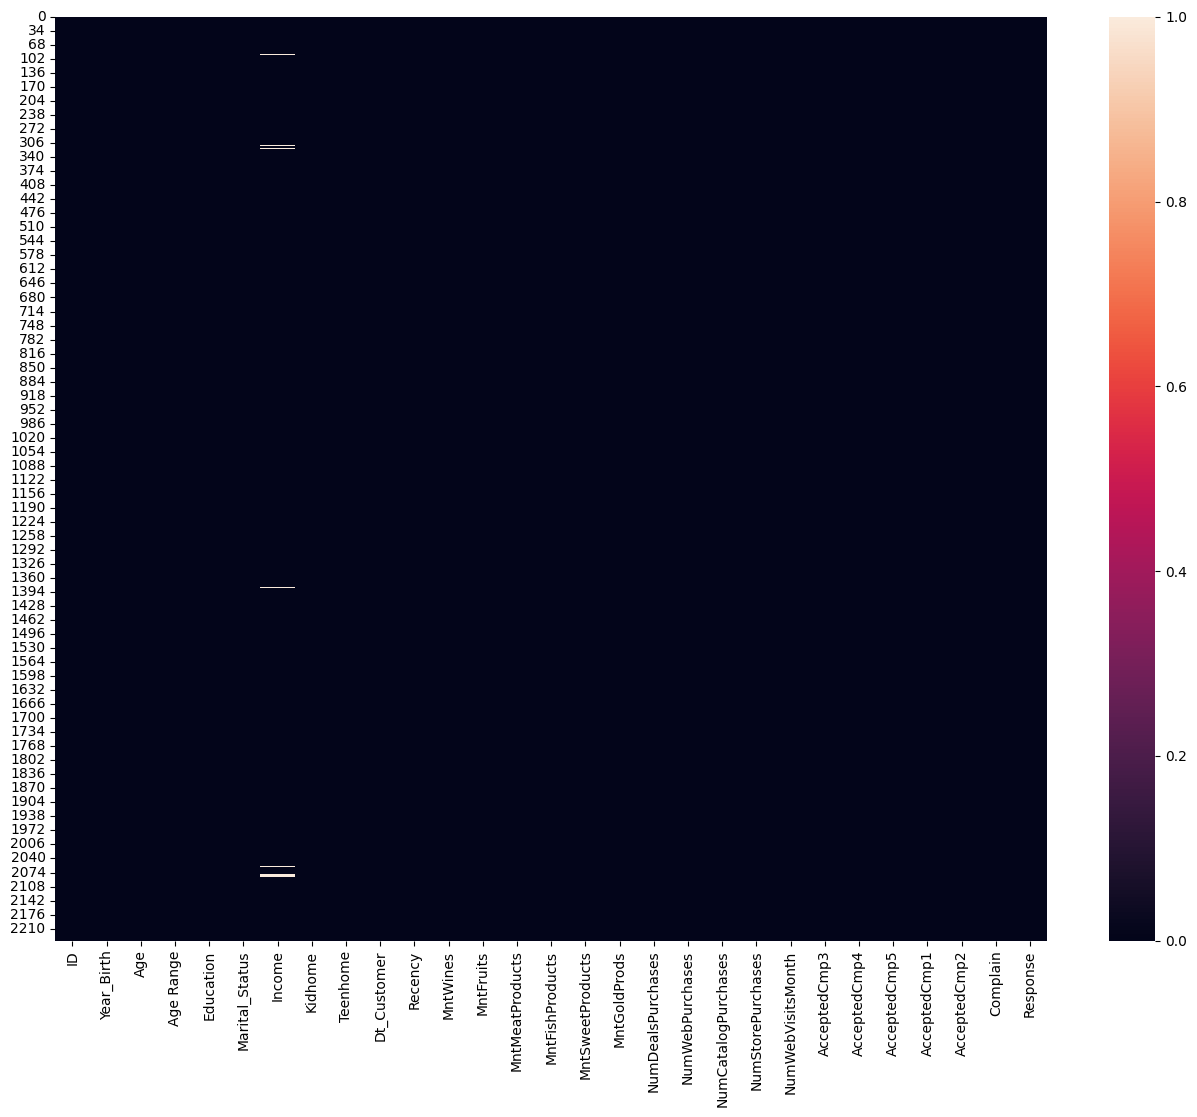

In [18]:
columnName = supermarket.columns.to_list()
plt.figure(figsize=(16,12))
sns.heatmap(supermarket[columnName].isna())
plt.show()

From the above data, it can be seen that only one column has missing values, namely the 'Income' column. Next, we will perform missing value handling on the dataset.

#### **Handling Missing Value in Income Column**

In [19]:
supermarket[supermarket['Income'].isna()]

,ID,Year_Birth,Age,Age Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,31,30s,Undergraduate,Married,NaN,1,0,2013-11-15,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,28,20s,Undergraduate,Single,NaN,1,0,2013-02-20,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,55,50s,PhD,Single,NaN,0,0,2013-11-05,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,63,More Than 60,Undergraduate,Single,NaN,2,1,2014-01-01,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,32,30s,Undergraduate,Single,NaN,1,0,2013-06-17,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,41,40s,Master,Married,NaN,1,0,2012-09-14,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,57,50s,PhD,Married,NaN,2,1,2012-11-19,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,57,50s,Undergraduate,Single,NaN,1,1,2014-05-27,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,41,40s,Master,Married,NaN,0,0,2013-11-23,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,53,50s,PhD,Married,NaN,0,1,2013-07-11,...,1,7,6,0,0,0,0,0,0,0


To fill in the missing values in the 'Income' column, let's take a look at the general distribution of income data.

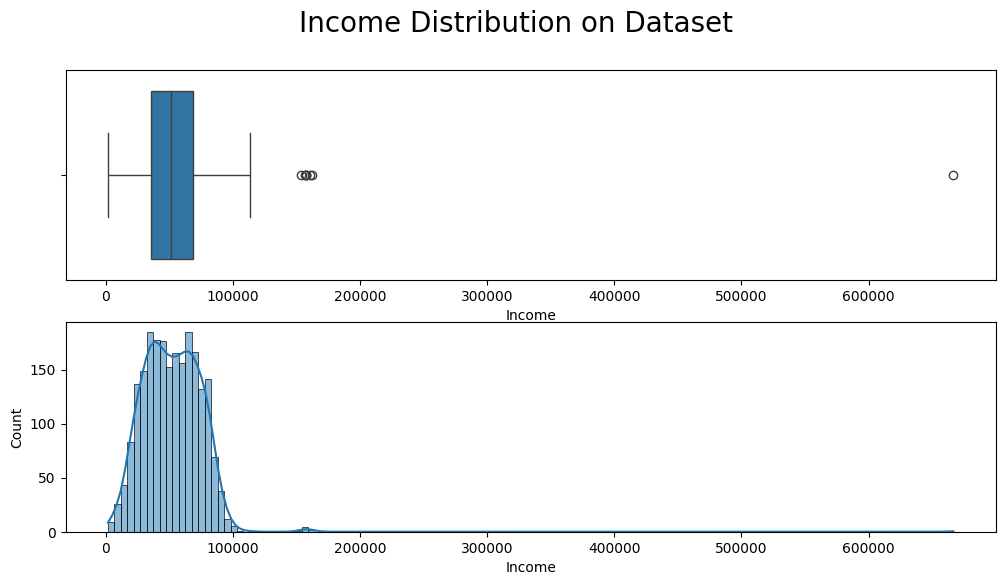

In [20]:
fig, axes = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6))

sns.boxplot(data=supermarket, x='Income',ax=axes[0])
sns.histplot(data=supermarket, x='Income', ax=axes[1],kde=True)

fig.suptitle('Income Distribution on Dataset', size = 20)
plt.show()

In [21]:
supermarket[supermarket['Income']>200000]

,ID,Year_Birth,Age,Age Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,37,30s,Undergraduate,Married,666666.0,1,0,2013-06-02,...,1,3,6,0,0,0,0,0,0,0


From here, we can see that there is an extreme outlier where an individual with only a bachelor's degree has an income 13 times higher than the average income, which is logically very unusual. Additionally, we can observe that this user has been a member since 2013 but has a relatively minimal number of transactions, making it not significantly influential on the dataset (only 1/2240 = 0.044%). Therefore, it is decided to drop this data point. Meanwhile, the other missing values will be filled using the Median because each customer has the potential for RFM analysis, allowing for appropriate treatment.

In [22]:
supermarket=supermarket.drop(index=2233)
supermarket.shape

(2239, 29)

After that, let's take another look at the income data distribution after removing that data point:

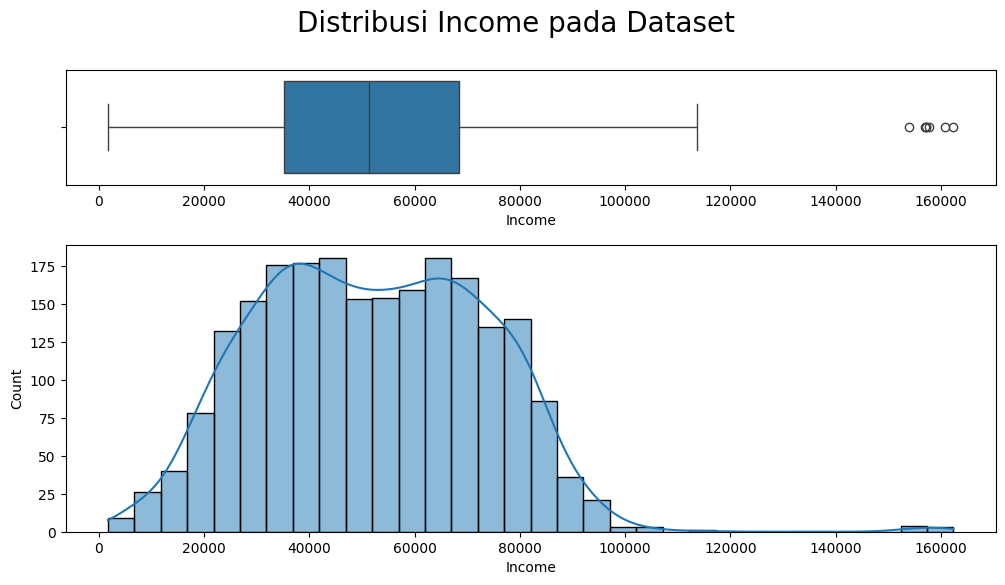

In [23]:
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3} 

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=supermarket, x='Income',ax=axes1)
sns.histplot(data=supermarket, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

In [24]:
supermarket['Income'].skew()

0.34734967591402816

In [25]:
supermarket['Income'].kurtosis()

0.7135488168867532

**Visual Analysis**

From the histogram, it can be observed that the income data tends to have a longer tail on the right, which is also confirmed by the boxplot showing many outliers on the right side. Additionally, the skewness calculation result indicates that the graph is positively skewed or right-skewed (skewness > 0), and the graph tends to be flat (kurtosis < 3). Based on these observations, the data distribution is suspected to be non-normal. To confirm this, a normality test will be conducted using the Shapiro-Wilk test (since the data size is < 5000, the Shapiro-Wilk method is generally more effective).

**Uji Normalitas**

In [26]:
stat, pvalue = shapiro(supermarket['Income'].dropna()) 
if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')  
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data tidak terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data tidak terdistribusi normal


**Normality Test Result**

From the above normality test results, we can conclude that the data is not normally distributed. Therefore, for filling in the missing values, we will use the median value. To make the imputation more accurate, we will try to classify income based on age range and education level. Then, we will fill in the missing values with the median income corresponding to the age range, education level, and marital status. Below is the table of median values for each class of age range and education level:



In [27]:
MedianIncome=supermarket.groupby(['Age Range','Education','Marital_Status'])[['Income']].median()
MedianIncome

Income
Age Range    Education     Marital_Status         
10s          Master        Married          7500.0
                           Single          81937.0
             Non-Graduate  Married         14421.0
             Undergraduate Single          34824.0
20s          Master        Divorced        23183.5
                           Married         29231.0
                           Single          56434.0
             Non-Graduate  Married         20425.0
                           Single          15719.0
             PhD           Married         67259.5
                           Single          42000.0
             Undergraduate Divorced        61386.0
                           Married         38508.0
                           Single          46923.0
30s          Master        Divorced        47682.0
                           Married         37284.0
                           Single          45993.5
             Non-Graduate  Divorced         9548.0
                           Married         24594.0
                           Single          22280.5
             PhD           Divorced        66476.0
                           Married         53807.0
                           Single          42997.0
             Undergraduate Divorced        56272.0
                           Married         43321.5
                           Single          47358.0
40s          Master        Divorced        50254.0
                           Married         47821.0
                           Single          43456.0
             Non-Graduate  Married         22390.0
                           Single          23529.0
             PhD           Divorced        47025.0
                           Married         55583.0
                           Single          47547.0
             Undergraduate Divorced        51813.0
                           Married         52265.0
                           Single          43322.0
50s          Master        Divorced        49476.0
                           Married         58646.0
                           Single          62651.5
             Non-Graduate  Divorced        22123.0
                           Married         28249.0
                           Single          15056.0
             PhD           Divorced        58909.0
                           Married         54456.0
                           Single          50198.0
             Undergraduate Divorced        52157.5
                           Married         58116.0
                           Single          58052.5
More Than 60 Master        Divorced        58442.0
                           Married         61439.0
                           Single          59199.5
             Non-Graduate  Married         26997.0
             PhD           Divorced        54985.0
                           Married         64014.0
                           Single          62159.0
             Undergraduate Divorced        64587.0
                           Married         55956.0
                           Single          60689.0

Filling each missing value in the income column with the median value corresponding to the age range, education level, and marital status.

In [28]:
# before filling the missing values
supermarket['Income'].isna().sum()

24

In [29]:
# Filling missing value according to median 
for i in supermarket[supermarket['Income'].isna()].index :
    supermarket['Income'][i] = MedianIncome.loc[[(supermarket['Age Range'][i],supermarket['Education'][i],supermarket['Marital_Status'][i])],'Income'].values

In [30]:
# after filling the missing values
supermarket['Income'].isna().sum()

0

Now, all missing values in the 'Income' column have been filled.

## **Feature Engineering**

Before moving on to the analysis stage, an additional column is needed in the analysis, which is the data on the number of people in each customer's household. To obtain this information, we can leverage the data from the Marital_Status, Kidhome, and Teenhome columns. The Family Members column is the sum of these three columns. However, for the Marital_Status column, if the status is single/divorced, the value is 1, while if the status is married, the value is 2.

### **Adding the 'Family Members' Column**

In [33]:
supermarket.insert(9,'Family Members',supermarket['Marital_Status'].apply(lambda x : 2 if x == 'Married' else 1)+supermarket['Kidhome']+supermarket['Teenhome'])
supermarket.head(4)

,ID,Year_Birth,Age,Age Range,Education,Marital_Status,Income,Kidhome,Teenhome,Family Members,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income Level
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,1,...,4,7,0,0,0,0,0,0,1,VIP
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,3,...,2,5,0,0,0,0,0,0,0,Executive
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2,...,10,4,0,0,0,0,0,0,0,VIP
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,3,...,4,6,0,0,0,0,0,0,0,Business


### **Overall Data Summary**

In summary, the following steps were taken in the data preprocessing and analysis:

1. Grouping customers based on age into the 'Age Range' column.
2. Dropping the 'Z_CostContact' and 'Z_Revenue' columns.
3. Handling missing values in the 'Income' column by dropping an extreme outlier and filling the remaining missing values with the median, considering age range, education level, and marital status.
4. Visual analysis indicating non-normal distribution in the 'Income' column.
5. Imputing missing values in the 'Income' column with the median corresponding to age range, education level, and marital status.
6. Adding the 'Family Members' column by summing the 'Kidhome' and 'Teenhome' columns, and adjusting for the marital status.

The data is now ready for further analysis.

In [34]:
listItem = []
for col in supermarket.columns :
    listItem.append([col, supermarket[col].dtype, supermarket[col].isna().sum(),supermarket[col].nunique(), list(supermarket[col].sample(2).values)])

supermarketDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(supermarket.shape)
supermarketDesc

(2239, 31)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2239,"[9167, 3571]"
1,Year_Birth,int64,0,59,"[1958, 1978]"
2,Age,int64,0,59,"[25, 44]"
3,Age Range,object,0,6,"[30s, 50s]"
4,Education,object,0,4,"[Undergraduate, PhD]"
5,Marital_Status,object,0,3,"[Married, Single]"
6,Income,float64,0,1982,"[28567.0, 56939.0]"
7,Kidhome,int64,0,3,"[0, 1]"
8,Teenhome,int64,0,3,"[2, 1]"
9,Family Members,int64,0,5,"[1, 3]"


To make it easier in writing the code, we will change the names of some columns.

In [35]:
RenameColumns = {'Year_Birth': 'Year Birth', 'Marital_Status': 'Marital Status','Dt_Customer': 'Registration Date'}
supermarket = supermarket.rename(columns=RenameColumns)
supermarket


,ID,Year Birth,Age,Age Range,Education,Marital Status,Income,Kidhome,Teenhome,Family Members,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income Level
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,1,...,4,7,0,0,0,0,0,0,1,VIP
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,3,...,2,5,0,0,0,0,0,0,0,Executive
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2,...,10,4,0,0,0,0,0,0,0,VIP
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,3,...,4,6,0,0,0,0,0,0,0,Business
4,5324,1981,33,30s,PhD,Married,58293.0,1,0,3,...,6,5,0,0,0,0,0,0,0,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,40s,Undergraduate,Married,61223.0,0,1,3,...,4,5,0,0,0,0,0,0,0,0
2236,4001,1946,68,More Than 60,PhD,Married,64014.0,2,1,5,...,5,7,0,0,0,1,0,0,0,0
2237,7270,1981,33,30s,Undergraduate,Divorced,56981.0,0,0,1,...,13,6,0,1,0,0,0,0,0,0
2238,8235,1956,58,50s,Master,Married,69245.0,0,1,3,...,10,3,0,0,0,0,0,0,0,0


## **Cleaned and Enhanced Data**
Now that the dataset has been cleaned, and additional columns have been added to facilitate the analysis part, here is a brief summary of the cleaned data:

- **Columns Added:**
  - 'Age Range': Grouping customers based on age.
  - 'Family Members': Sum of 'Kidhome' and 'Teenhome' columns, adjusted for marital status.

- **Columns Dropped:**
  - 'Z_CostContact'
  - 'Z_Revenue'

- **Handling Missing Values:**
  - 'Income': Outlier removal and imputation with the median, considering age range, education level, and marital status.

The dataset is now ready for further analysis.

### **Descriptive Statistic**

In [36]:
display(supermarket.describe(),supermarket.describe(include='object'))

,Year Birth,Age,Income,Kidhome,Teenhome,Family Members,Registration Date,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,1968.802144,45.197856,51963.714605,0.443948,0.506476,2.594908,2013-07-10 10:26:25.350603008,49.121036,304.067441,26.307727,...,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,0.149174
min,1893.000000,18.000000,1730.000000,0.000000,0.000000,1.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,37.000000,35533.500000,0.000000,0.000000,2.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,44.000000,51373.000000,0.000000,0.000000,3.000000,2013-07-09 00:00:00,49.000000,174.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,55.000000,68277.500000,1.000000,1.000000,3.000000,2013-12-30 12:00:00,74.000000,504.500000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,121.000000,162397.000000,2.000000,2.000000,5.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,11.985494,11.985494,21423.546125,0.538390,0.544555,0.907122,NaN,28.963662,336.614830,39.781468,...,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.356339


,ID,Age Range,Education,Marital Status,Income Level
count,2239,2239,2239,2239,2239
unique,2239,6,4,3,5
top,5524,40s,Undergraduate,Married,VIP
freq,1,676,1126,1443,1163


The dataset, originally consisting of 2240 rows and 29 columns, now has 2239 rows and 30 columns. This change is due to the dropping of 1 irrelevant data row, the addition of 2 columns to facilitate analysis, and the filling of 24 missing values with the most relevant data.

## **Data Distribution Analysis**

Before conducting an analysis based on specific criteria, we will check the data distribution for each numerical column to see if there is anything interesting in the distribution. We will use histplot and boxplot to get an overview of these distributions.

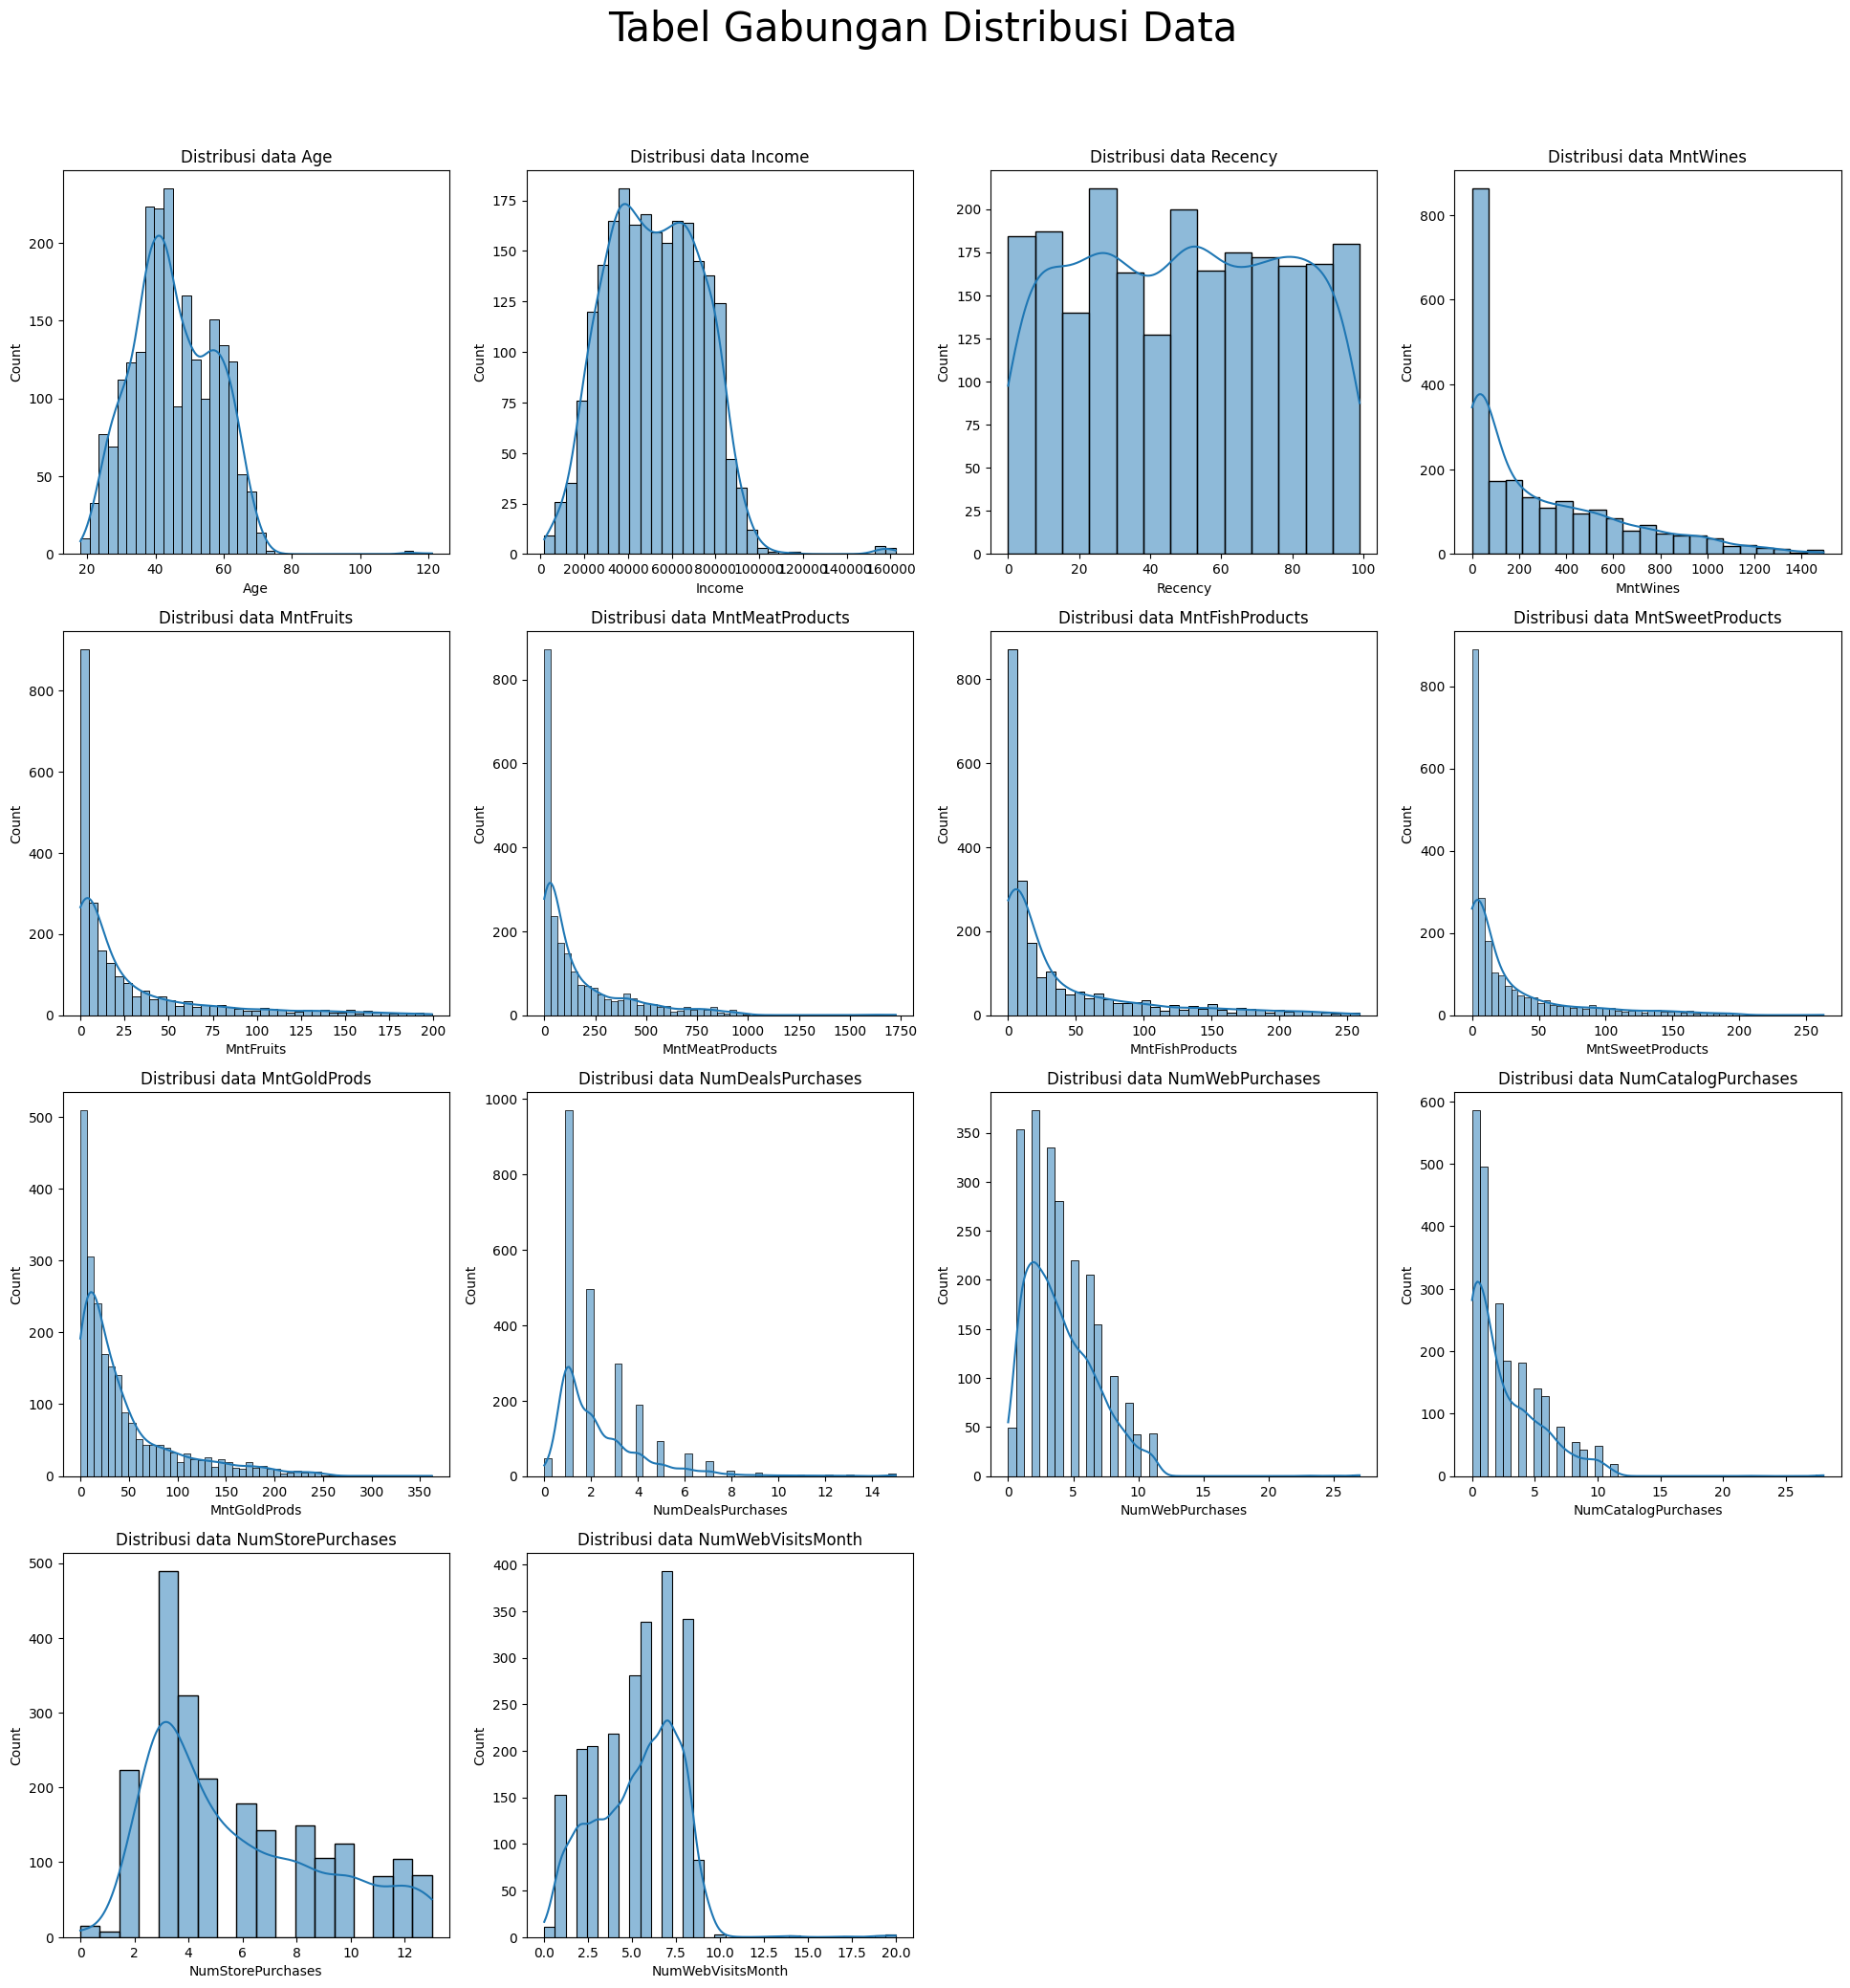

In [37]:
listKolom = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==14 : 
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=supermarket, x=listKolom[kolom], kde=True)
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data', size=30, y=0.95)
plt.show()

**Analysis**

- The 'age' and 'income' columns show distributions that follow a bell curve typical of normal distributions (normality will be checked in the next session).
- The columns representing spending on each product and the total spending exhibit curves with a central tendency around 0. This is because many users may not purchase certain products at all but may buy other products.
- Other columns show relatively random distributions, and their normality will be checked later.

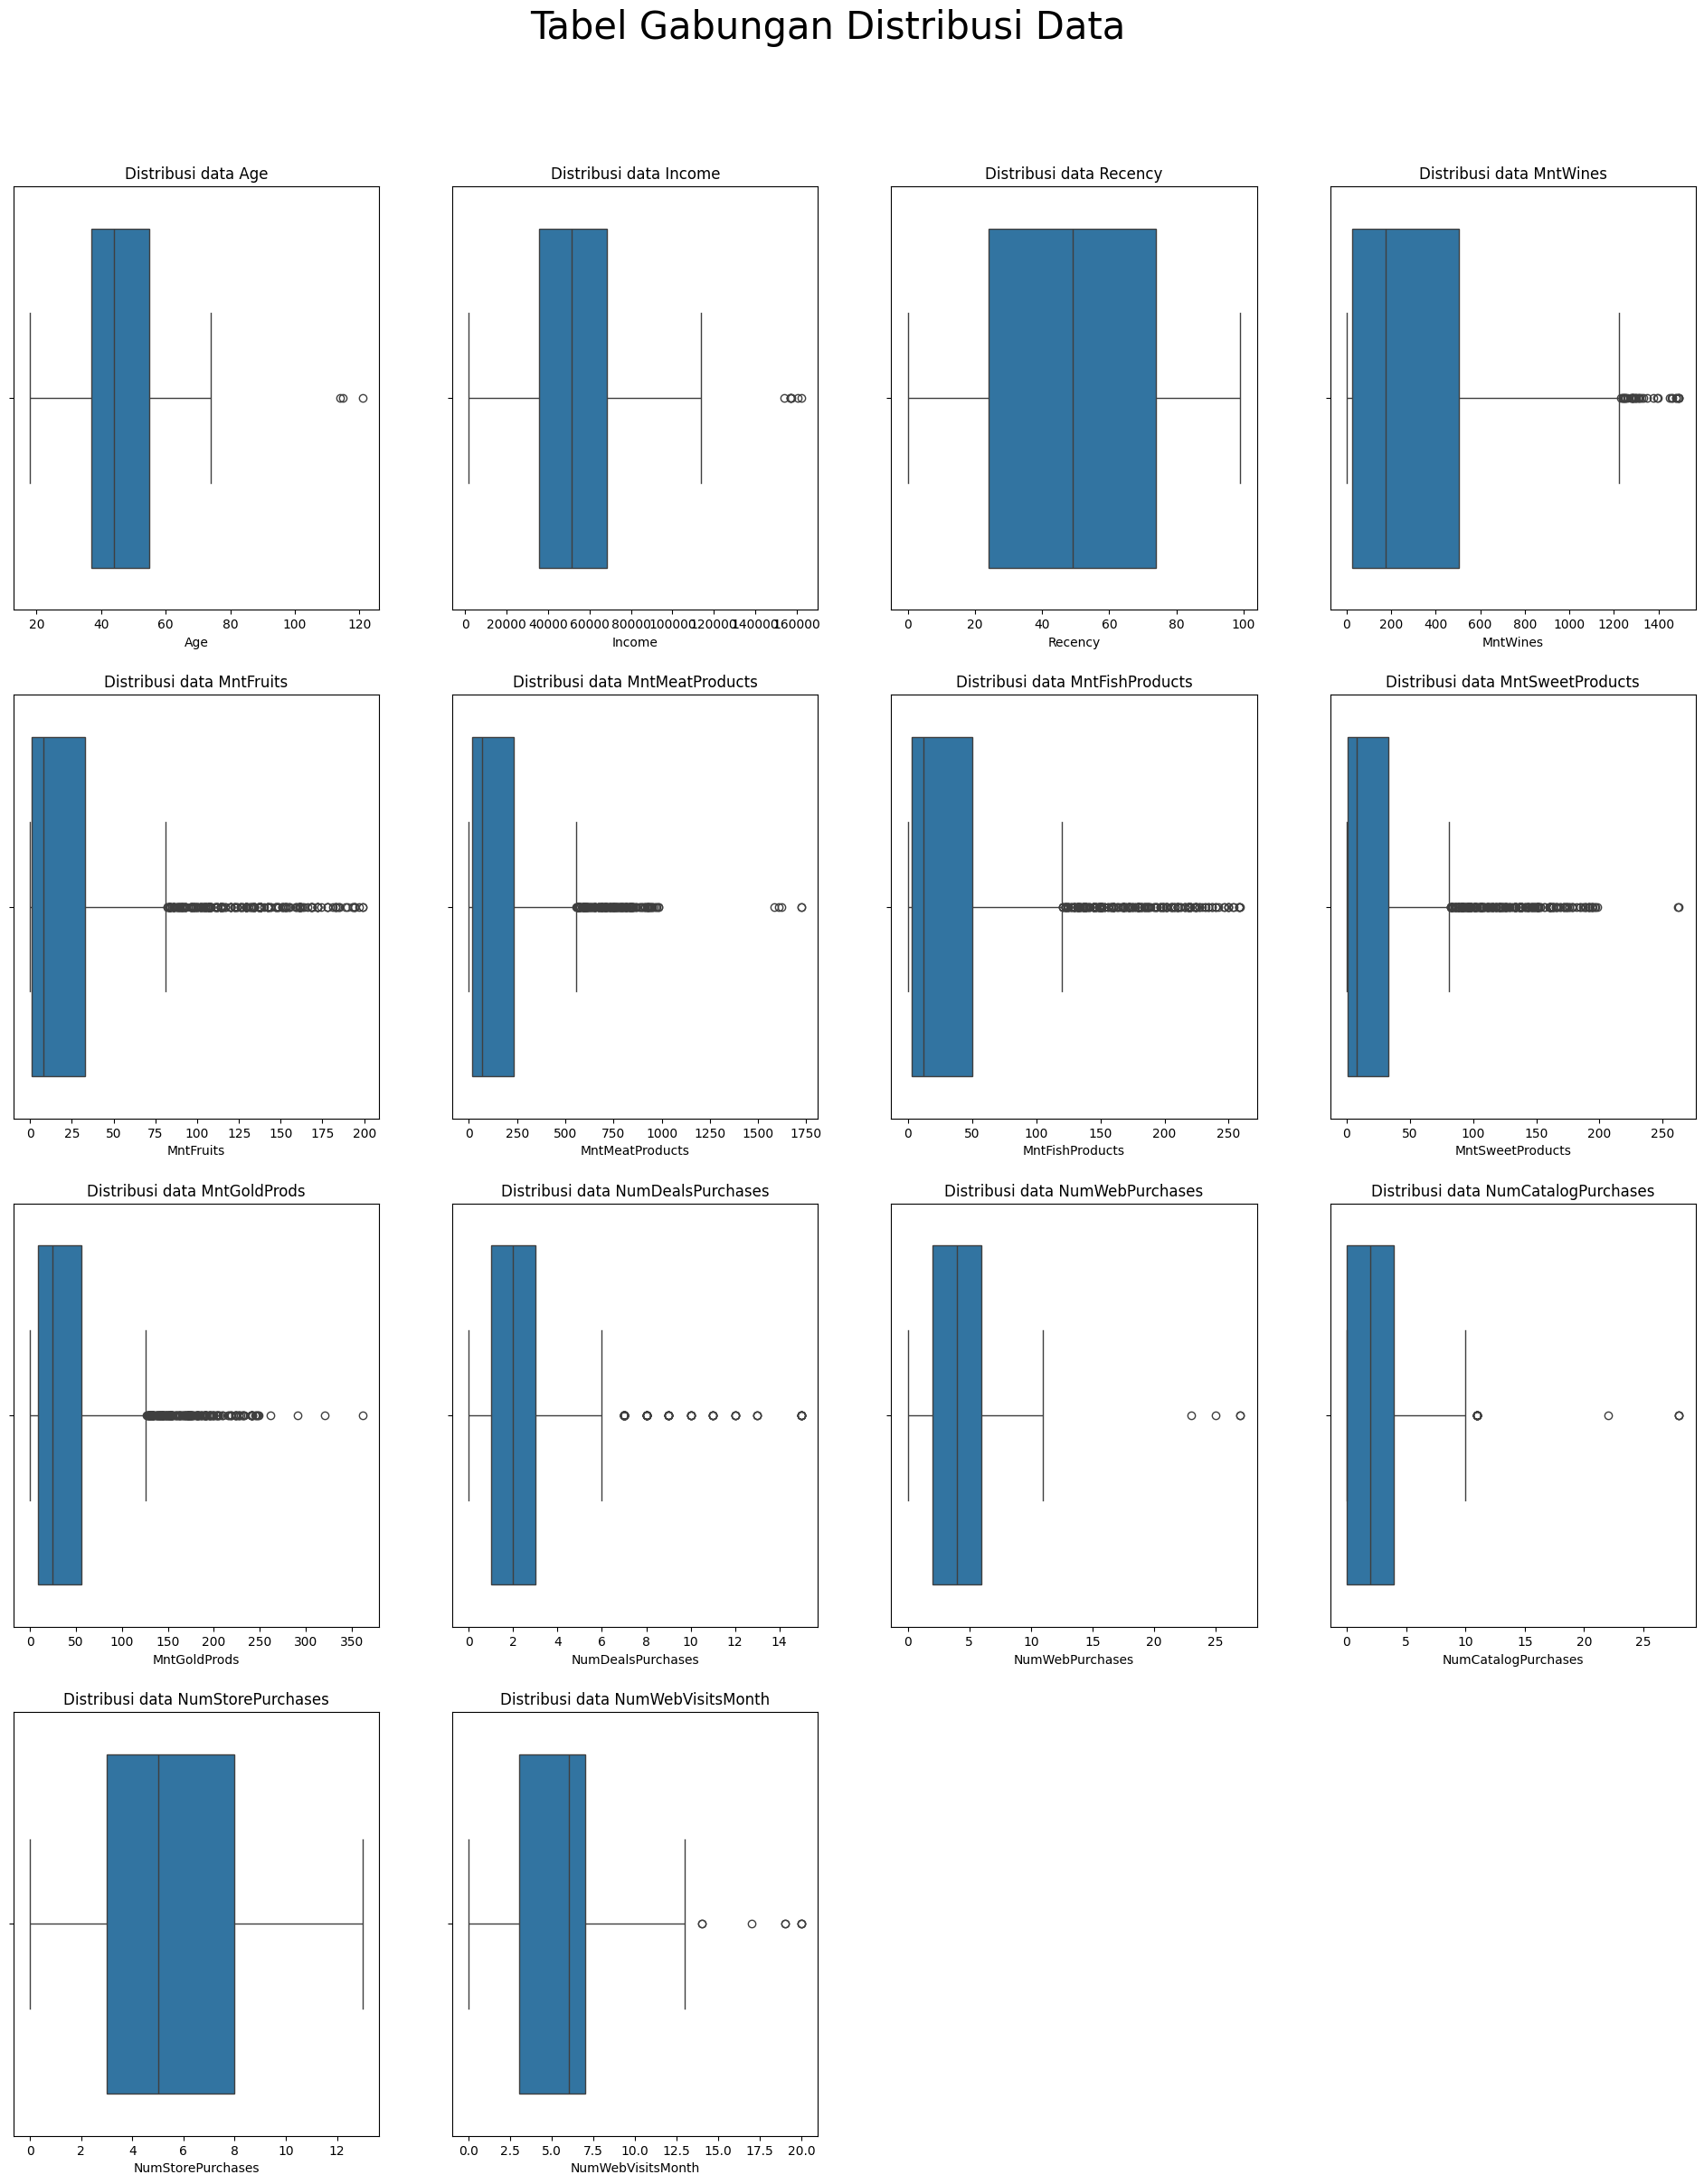

In [38]:
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,28))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==14 :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data=supermarket, x=listKolom[kolom])
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data', size=30, y=0.95)
plt.show()

**Analysis**

- There are no left outliers in all the data. This is because the minimum values are 0 (there are no negative values), so some lower fences are smaller than (Q1 - 1.5 IQR).
- The 'spent' columns for each product have a significant number of right outliers. This is because some customers really like certain products, so they buy them in much larger quantities than the average person.
- The 'recency' and 'NumStorePurchases' columns do not have outliers.

### **Normality Check**

Since the data has only 2239 rows (< 5000 rows), the Shapiro-Wilk test will be used for the normality test as it is more accurate in this case.

In [39]:
listpvalue = []
listStatusNormal = []

for i in listKolom :
    stat,pvalue=shapiro(supermarket[i])
    if pvalue>=0.05:
        status = 'normal distribution' #fail to reject Ho
    else: 
        status = 'not normal distribution' #reject Ho (Ha)
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [40]:
ujiNormalitas = pd.DataFrame({
    'Column Name' : listKolom,
    'Pvalue' : listpvalue,
    'Status Normalitas' : listStatusNormal
})
ujiNormalitas

,Column Name,Pvalue,Status Normalitas
0,Age,4.602783e-19,not normal distribution
1,Income,5.022576e-19,not normal distribution
2,Recency,5.787724e-26,not normal distribution
3,MntWines,5.983544e-43,not normal distribution
4,MntFruits,0.000000e+00,not normal distribution
5,MntMeatProducts,0.000000e+00,not normal distribution
6,MntFishProducts,0.000000e+00,not normal distribution
7,MntSweetProducts,0.000000e+00,not normal distribution
8,MntGoldProds,0.000000e+00,not normal distribution
9,NumDealsPurchases,0.000000e+00,not normal distribution


**Analysis**
- From here, it can be seen that none of the data is normally distributed.
- All subsequent statistical tests in the analysis will use non-parametric tests.
- To compare values between categories, `median` will be used for all columns.

## **RMF Analysis**

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

Since, we already have a column for Recency, we will make Frequency and Monetary columns by calculating numbers of purchases and total money spent.

In [41]:
supermarket.insert(12,'Frequency',supermarket['NumDealsPurchases']+supermarket['NumWebPurchases']+supermarket['NumCatalogPurchases']+supermarket['NumStorePurchases']+supermarket['NumWebVisitsMonth'])
supermarket.head(4)

,ID,Year Birth,Age,Age Range,Education,Marital Status,Income,Kidhome,Teenhome,Family Members,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income Level
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,1,...,4,7,0,0,0,0,0,0,1,VIP
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,3,...,2,5,0,0,0,0,0,0,0,Executive
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2,...,10,4,0,0,0,0,0,0,0,VIP
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,3,...,4,6,0,0,0,0,0,0,0,Business


In [42]:
supermarket.insert(13,'Monetary',supermarket['MntWines']+supermarket['MntFruits']+supermarket['MntMeatProducts']+supermarket['MntFishProducts']+supermarket['MntSweetProducts']+supermarket['MntGoldProds'])
supermarket.head(4)

,ID,Year Birth,Age,Age Range,Education,Marital Status,Income,Kidhome,Teenhome,Family Members,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income Level
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,1,...,4,7,0,0,0,0,0,0,1,VIP
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,3,...,2,5,0,0,0,0,0,0,0,Executive
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2,...,10,4,0,0,0,0,0,0,0,VIP
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,3,...,4,6,0,0,0,0,0,0,0,Business


**Create the RFM Table**

In [43]:
rfmtable = supermarket.pivot_table(index='ID', values=['Recency', 'Frequency', 'Monetary'])
rfmtable

,Frequency,Monetary,Recency
ID,,,
0,18.0,1198.0,66.0
1,23.0,577.0,0.0
1000,32.0,964.0,48.0
10001,19.0,100.0,98.0
10010,20.0,152.0,43.0
...,...,...,...
9984,30.0,724.0,25.0
9986,17.0,54.0,8.0
9988,29.0,860.0,84.0


**Determining RFM Quartiles**

Being high recency is bad, while high frequency and monetary is good. So, we will divide on how we calculate between Recency and Frequency+Monetary.

In [44]:
# make pivot table
r_quant = supermarket.pivot_table(index='ID', values=['Recency'])

# add quantiles into data
quantiles = [0, 0.25, 0.5, 0.75, 1.0]  # Definisi kuantil

quantile_labels = [4, 3, 2, 1]  # Label untuk kategori kuantil

# use qcut to add quantile categories into data
quantile_columns = ['Recency']

for column in quantile_columns:
    r_quant[column + ' Quantile'] = pd.qcut(r_quant[column], q=quantiles, labels=quantile_labels)

# show result
r_quant

,Recency,Recency Quantile
ID,,
0,66.0,2
1,0.0,4
1000,48.0,3
10001,98.0,1
10010,43.0,3
...,...,...
9984,25.0,3
9986,8.0,4
9988,84.0,1


In [45]:
fm_quant = supermarket.pivot_table(index='ID', values=['Frequency', 'Monetary'])

quantiles = [0, 0.25, 0.5, 0.75, 1.0]  

quantile_labels = [1, 2, 3, 4]  

quantile_columns = ['Frequency', 'Monetary']

for column in quantile_columns:
    fm_quant[column + ' Quantile'] = pd.qcut(fm_quant[column], q=quantiles, labels=quantile_labels)

fm_quant

,Frequency,Monetary,Frequency Quantile,Monetary Quantile
ID,,,,
0,18.0,1198.0,2,4
1,23.0,577.0,3,3
1000,32.0,964.0,4,3
10001,19.0,100.0,2,2
10010,20.0,152.0,3,2
...,...,...,...,...
9984,30.0,724.0,4,3
9986,17.0,54.0,2,1
9988,29.0,860.0,4,3


Next, we will merge those 2 columns

In [46]:
rfmtable = pd.merge(rfmtable, fm_quant, on='ID')
rfmtable


,Frequency_x,Monetary_x,Recency,Frequency_y,Monetary_y,Frequency Quantile,Monetary Quantile
ID,,,,,,,
0,18.0,1198.0,66.0,18.0,1198.0,2,4
1,23.0,577.0,0.0,23.0,577.0,3,3
1000,32.0,964.0,48.0,32.0,964.0,4,3
10001,19.0,100.0,98.0,19.0,100.0,2,2
10010,20.0,152.0,43.0,20.0,152.0,3,2
...,...,...,...,...,...,...,...
9984,30.0,724.0,25.0,30.0,724.0,4,3
9986,17.0,54.0,8.0,17.0,54.0,2,1
9988,29.0,860.0,84.0,29.0,860.0,4,3


In [47]:
rfmtable = pd.merge(rfmtable, r_quant, on='ID')
rfmtable


,Frequency_x,Monetary_x,Recency_x,Frequency_y,Monetary_y,Frequency Quantile,Monetary Quantile,Recency_y,Recency Quantile
ID,,,,,,,,,
0,18.0,1198.0,66.0,18.0,1198.0,2,4,66.0,2
1,23.0,577.0,0.0,23.0,577.0,3,3,0.0,4
1000,32.0,964.0,48.0,32.0,964.0,4,3,48.0,3
10001,19.0,100.0,98.0,19.0,100.0,2,2,98.0,1
10010,20.0,152.0,43.0,20.0,152.0,3,2,43.0,3
...,...,...,...,...,...,...,...,...,...
9984,30.0,724.0,25.0,30.0,724.0,4,3,25.0,3
9986,17.0,54.0,8.0,17.0,54.0,2,1,8.0,4
9988,29.0,860.0,84.0,29.0,860.0,4,3,84.0,1


In [48]:
# Deleting duplicate columns
rfmtable = rfmtable.drop(columns=['Recency_y', 'Frequency_y', 'Monetary_y'])

# Renaming duplicate columns
rfmtable = rfmtable.rename(columns={'Recency_x': 'Recency','Frequency_x' : 'Frequency', 'Monetary_x' : 'Monetary' })


In [49]:
# Assuming 'Recency Quantile', 'Frequency Quantile', and 'Monetary Quantile' are categorical columns
rfmtable['Recency Quantile'] = rfmtable['Recency Quantile'].astype(int)
rfmtable['Frequency Quantile'] = rfmtable['Frequency Quantile'].astype(int)
rfmtable['Monetary Quantile'] = rfmtable['Monetary Quantile'].astype(int)


In [50]:
rfmtable['RFM Score'] = np.sum(rfmtable[['Frequency Quantile', 'Monetary Quantile', 'Recency Quantile']], axis=1)
rfmtable

,Frequency,Monetary,Recency,Frequency Quantile,Monetary Quantile,Recency Quantile,RFM Score
ID,,,,,,,
0,18.0,1198.0,66.0,2,4,2,8
1,23.0,577.0,0.0,3,3,4,10
1000,32.0,964.0,48.0,4,3,3,10
10001,19.0,100.0,98.0,2,2,1,5
10010,20.0,152.0,43.0,3,2,3,8
...,...,...,...,...,...,...,...
9984,30.0,724.0,25.0,4,3,3,10
9986,17.0,54.0,8.0,2,1,4,7
9988,29.0,860.0,84.0,4,3,1,8


* Assigning a specific label to each client, according to the total score column. So:*
If total_Score = 12, then "Excellent"
If 7 <= total_Score < 12, then "Good"
If 3 <= total_Score < 7, then "Bad"
If 1 <= total_Score < 3, then "Only 1 transaction?"

In [51]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(rfmtable)

for i in range(0,len(rfmtable)):

    if rfmtable['RFM Score'][i] >= 11:
        label[i] = "Excellent"
        
    elif rfmtable['RFM Score'][i] >= 7 :
        label[i] = "Good"
        
    elif rfmtable['RFM Score'][i] >= 2:
        label[i] = "Bad"
        
    else:
        label[i] = "Only 1 transaction?"   

In [52]:
# Adding the 'Label' column to our dataframe

rfmtable['Label'] = label

In [53]:
# Count the frequency that a value occurs in a dataframe column for the labels.

rfmtable['Label'].value_counts()

Label
Good         1161
Bad           827
Excellent     251
Name: count, dtype: int64

In [54]:
# Setting up the label for each client and adding the column "Label" to the dataframe

treatment = [0] * len(rfmtable)

for i in range(0,len(rfmtable)):

    if rfmtable['RFM Score'][i] == 12:
        treatment[i] = "Loyal"
        
    elif rfmtable['RFM Score'][i] >= 9 :
        treatment[i] = "Potential Loyalist"
    
    elif rfmtable['RFM Score'][i] >= 6 :
        treatment[i] = "Need Attention"
        
    elif rfmtable['RFM Score'][i] >= 3:
        treatment[i] = "At Risk"
        
    else:
        treatment[i] = "Lost"   

In [55]:
# Adding the 'Label' column to our dataframe

rfmtable['Treatment'] = treatment

In [56]:
# Count the frequency that a value occurs in a dataframe column for the labels.

rfmtable['Treatment'].value_counts()

Treatment
Need Attention        855
Potential Loyalist    794
At Risk               540
Loyal                  50
Name: count, dtype: int64

## LABEL

**We are changing the background color of the label, based on the label value so that we can sort the clients faster.**

Next, we will merge RFM table with main Data (Supermarket).

In [57]:
supermarket = pd.merge(supermarket, rfmtable, on='ID')
supermarket


,ID,Year Birth,Age,Age Range,Education,Marital Status,Income,Kidhome,Teenhome,Family Members,...,Income Level,Frequency_y,Monetary_y,Recency_y,Frequency Quantile,Monetary Quantile,Recency Quantile,RFM Score,Label,Treatment
0,5524,1957,57,50s,Undergraduate,Single,58138.0,0,0,1,...,VIP,32.0,1617.0,58.0,4,4,2,10,Good,Potential Loyalist
1,2174,1954,60,More Than 60,Undergraduate,Single,46344.0,1,1,3,...,Executive,11.0,27.0,38.0,1,1,3,5,Bad,At Risk
2,4141,1965,49,40s,Undergraduate,Married,71613.0,0,0,2,...,VIP,25.0,776.0,26.0,3,3,3,9,Good,Potential Loyalist
3,6182,1984,30,30s,Undergraduate,Married,26646.0,1,0,3,...,Business,14.0,53.0,26.0,1,1,3,5,Bad,At Risk
4,5324,1981,33,30s,PhD,Married,58293.0,1,0,3,...,VIP,24.0,422.0,94.0,3,3,1,7,Good,Need Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10870,1967,47,40s,Undergraduate,Married,61223.0,0,1,3,...,0,23.0,1341.0,46.0,3,4,3,10,Good,Potential Loyalist
2235,4001,1946,68,More Than 60,PhD,Married,64014.0,2,1,5,...,0,29.0,444.0,56.0,4,3,2,9,Good,Potential Loyalist
2236,7270,1981,33,30s,Undergraduate,Divorced,56981.0,0,0,1,...,0,25.0,1241.0,91.0,3,4,1,8,Good,Need Attention
2237,8235,1956,58,50s,Master,Married,69245.0,0,1,3,...,0,26.0,843.0,8.0,4,3,4,11,Excellent,Potential Loyalist


In [58]:
def color(val):
    if val in ["Excellent", "Loyal"]:
        color = 'green'
    elif val in ["Good", "Potential Loyalist"]:
        color = 'blue'
    elif val in ["Bad", "At Risk"]:
        color = 'red'
    elif val == "Need Attention":
        color = 'orange'
    else:
        color = ''  # Handle other cases if needed
    return 'background-color: %s' % color

rfmtable.style.applymap(color, subset=['Label', 'Treatment'])


,Frequency,Monetary,Recency,Frequency Quantile,Monetary Quantile,Recency Quantile,RFM Score,Label,Treatment
ID,,,,,,,,,
0,18.000000,1198.000000,66.000000,2,4,2,8,Good,Need Attention
1,23.000000,577.000000,0.000000,3,3,4,10,Good,Potential Loyalist
1000,32.000000,964.000000,48.000000,4,3,3,10,Good,Potential Loyalist
10001,19.000000,100.000000,98.000000,2,2,1,5,Bad,At Risk
10010,20.000000,152.000000,43.000000,3,2,3,8,Good,Need Attention
10022,9.000000,16.000000,78.000000,1,1,1,3,Bad,At Risk
10031,20.000000,53.000000,50.000000,3,1,2,6,Bad,Need Attention
10032,17.000000,53.000000,86.000000,2,1,1,4,Bad,At Risk
10033,11.000000,38.000000,54.000000,1,1,2,4,Bad,At Risk


In [59]:
# Deleting duplicate columns
supermarket = supermarket.drop(columns=['Recency_y', 'Frequency_y', 'Monetary_y'])

# Renaming duplicate columns
supermarket = supermarket.rename(columns={'Recency_x': 'Recency','Frequency_x' : 'Frequency', 'Monetary_x' : 'Monetary' })


In [60]:
# supermarket.to_excel('supermarket_rfm.xlsx')

In [61]:
supermarket['Label'].value_counts()

Label
Good         1161
Bad           827
Excellent     251
Name: count, dtype: int64

In [62]:
# Calculate percentage
percentage = (supermarket['Label'].value_counts(normalize=True) * 100).reset_index(name='Persentase')

# Create pie chart using Plotly Express
fig = px.pie(percentage, names='Label', values='Persentase',
             labels={'index': 'Label', 'Persentase': 'Percentage'},
             title='Persentase Label Customer')

# Add percentage labels to pie chart
fig.update_traces(textinfo='percent+label', pull=[0.1, 0], textposition='inside')

# Show the plot
fig.show()


1. **Dominance of the "Good" Label:**
   - The "Good" label dominates the data with a percentage of approximately 51.85%, indicating that the majority of the data exhibits characteristics or qualities considered good.

2. **Possibility of Low Quality:**
   - Although the "Bad" label has a percentage of 36.94%, it still represents a significant proportion of the data. This suggests the existence of a substantial amount of data with characteristics or qualities considered poor.

3. **"Excellent" Label:**
   - The "Excellent" label has a percentage of 11.21%, indicating that only a small portion of the data exhibits very high-quality characteristics.

4. **Comparison Between Labels:**
   - The comparison between the "Good" and "Bad" labels is substantial, indicating that the majority of the data is considered good, but there is a significant portion of data considered bad.

5. **Recommendations or Actions:**
   - Based on the label distribution, appropriate actions or recommendations can be made depending on the analysis goals. For instance, if the objective is to improve quality or characteristics, focus may be directed towards areas currently labeled as "Bad" or "Excellent" to enhance or maintain quality.

It's important to note that the interpretation is highly context-dependent and tied to the broader goals of the analysis. Further analysis and a deeper understanding of the observed variables would provide richer insights.

In [63]:
supermarket['Treatment'].value_counts()

Treatment
Need Attention        855
Potential Loyalist    794
At Risk               540
Loyal                  50
Name: count, dtype: int64

In [64]:
# Calculate percentage
percentage = (supermarket['Treatment'].value_counts(normalize=True) * 100).reset_index(name='Persentase')

# Create pie chart using Plotly Express
fig = px.pie(percentage, names='Treatment', values='Persentase',
             labels={'index': 'Treatment', 'Persentase': 'Percentage'},
             title='Persentase Treatment Customer')

# Add percentage labels to pie chart
fig.update_traces(textinfo='percent+label', pull=[0.1, 0], textposition='inside')

# Show the plot
fig.show()


From the given data, there are four treatment categories: "Need Attention," "Potential Loyalist," "At Risk," and "Loyal," with the following counts:

- Need Attention: 855
- Potential Loyalist: 794
- At Risk: 540
- Loyal: 50

In terms of percentages, the distribution of treatments is as follows:

- Need Attention: 38.19%
- Potential Loyalist: 35.46%
- At Risk: 24.12%
- Loyal: 2.23%

Here are some insights based on this data:

1. **Focus on "Need Attention" and "Potential Loyalist":**
   - The majority of individuals fall into the categories of "Need Attention" and "Potential Loyalist," which together account for more than 73% of the total. This indicates that efforts should be directed towards engaging and retaining this larger segment.

2. **Risk and Loyalty Segments:**
   - The "At Risk" category comprises a significant portion (24.12%), suggesting individuals who may require targeted efforts to prevent potential issues or disengagement. On the other hand, the "Loyal" category is relatively small at 2.23%, indicating a smaller but highly valuable group that may warrant special attention for loyalty programs or retention strategies.

3. **Distribution Imbalance:**
   - The distribution of individuals across the categories is not uniform. Addressing the needs of the larger segments, such as "Need Attention" and "Potential Loyalist," may have a more substantial impact on the overall outcome.

4. **Strategic Decision-Making:**
   - Understanding the distribution allows for strategic decision-making. For example, resources and initiatives can be tailored based on the specific characteristics of each segment. More intensive interventions may be applied to the "At Risk" category, while loyalty programs or recognition may be targeted at the "Loyal" segment.

These insights can guide targeted marketing, customer service, and retention strategies, ultimately contributing to more effective and efficient business outcomes.

## **Analyzing Product and Customer's Behavior using RFM Analysis**


In [71]:
# Choosing columns to show in the bar chart
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Grouping columns 
supermarket_table = supermarket.groupby('Label')[columns].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(supermarket_table, id_vars=['Label'], value_vars=columns, var_name='Product', value_name='Total Spending')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Product', y='Total Spending', color='Label',
             title="Total Spending on Products by Customers' Label",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Product',
    yaxis_title='Total Spending',
    legend_title='Label'
)

fig.show()


"Total Spending on Products by Customers' Label." Here are some insights based on the visual data presented:

1. *Product Categories*: The chart shows different product categories such as Wines, Fruits, Meat Products, Fish Products, Sweet Products, and Gold Products.

2. *Customer Labels*: There are three labels for customers - 'Bad,' 'Excellent,' and 'Good,' which likely indicate the level of spending or perhaps the quality of customers based on their purchasing behavior.

3. *Spending Patterns*:
   - *Wines*: This category has the highest total spending, with 'Good' customers contributing the most, followed by 'Excellent,' and then 'Bad.'
   - *Meat Products*: The second highest category, again with 'Good' customers leading in spending, followed closely by 'Excellent' customers.
   - *Fish, Sweets, and Gold Products*: These categories show a similar pattern of spending, with 'Good' and 'Excellent' customers contributing almost equally, and 'Bad' customers contributing a much smaller amount.
   - *Fruits*: This category has the least total spending, and the contribution from 'Bad' customers is minimal.

4. *Customer Behavior*: 'Good' customers are the leading spenders in every product category, which might suggest that they are the core customer base for these products. 'Excellent' customers, while spending less overall, still contribute significantly, especially in the Meat and Fish Products categories. 'Bad' customers contribute the least amount of spending across all product categories.

5. *Business Insights*:
   - The business might consider focusing marketing efforts on the 'Good' customer segment since they are the primary contributors to sales.
   - There could be potential to grow the 'Excellent' customer base, given their significant contributions in certain categories.
   - For 'Bad' customers, the business might want to explore strategies to increase their engagement and spending.

6. *Potential Strategies*:
   - *Product Focus*: Given the high spending on Wines and Meat Products, these could be key areas for promotion and stock variety.
   - *Customer Retention*: For 'Good' and 'Excellent' customers, loyalty programs or targeted upselling might be effective.
   - *Customer Improvement*: Investigating why 'Bad' customers spend less and developing strategies to convert them into higher spending brackets could be beneficial.

This chart is a tool for understanding customer spending habits and can inform business decisions on inventory, marketing, and customer relationship management.

In [72]:
# Choosing columns to show in the bar chart
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Grouping columns
supermarket_table = supermarket.groupby('Treatment')[columns].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(supermarket_table, id_vars=['Treatment'], value_vars=columns, var_name='Product', value_name='Total Spending')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Product', y='Total Spending', color='Treatment',
             title="Total Spending on Products by Customers' Treatment",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Product',
    yaxis_title='Total Spending',
    legend_title='Treatment'
)

fig.show()


"Total Spending on Products by Customers' Treatment." Here are some insights based on the visual data:

1. *Customer Segmentation*: The customers are segmented into four treatment groups: 'At Risk', 'Loyal', 'Need Attention', and 'Potential Loyalist'.

2. *Spending Patterns*:
   - *Wines*: This product category has the highest spending across all treatment groups. Notably, 'Potential Loyalist' customers contribute the most to this category, followed by 'Loyal', 'Need Attention', and 'At Risk' customers, respectively.
   - *Meat Products*: 'Potential Loyalist' customers again contribute the most to this category, but with a significant amount also coming from 'Loyal' customers. 'At Risk' and 'Need Attention' customers contribute less.
   - *Fruits, Fish, Sweet, and Gold Products*: These categories have comparatively lower spending than Wines and Meat Products. The distribution across treatment groups is also more even in these categories, with 'Potential Loyalist' still contributing the most.

3. *Customer Behavior*:
   - *Potential Loyalists*: This group appears to be the most valuable across all product categories, indicating that they are either newer customers who are quickly becoming frequent shoppers, or they are customers who are responding well to marketing treatments.
   - *Loyal Customers*: They have significant spending in the Wines and Meat Products categories, showing that they are consistently spending on these products.
   - *Customers Needing Attention*: This group has a moderate level of spending across all product categories. Strategies to move them into a higher spending bracket or to convert them into loyal customers could be considered.
   - *At Risk Customers*: This group has the lowest spending in all categories, indicating they may be losing interest or satisfaction with the products or services. Retention strategies will be crucial for this segment.

4. *Business Insights*:
   - *Product Strategy*: Given the high spending in the Wines and Meat Products categories, these could be focal points for inventory and promotional efforts.
   - *Retention and Growth*: There is a need to develop targeted strategies for each customer segment to increase their spending and move them towards becoming 'Loyal' or 'Potential Loyalist'.
   - *At Risk Management*: It's critical to understand why 'At Risk' customers are spending less and to implement retention strategies to prevent them from leaving.

5. *Strategic Actions*:
   - *Engagement Programs*: Tailoring engagement and loyalty programs for 'Potential Loyalists' and 'Loyal' customers could further increase their spending.
   - *Customer Support*: Improving customer service for the 'Need Attention' group might increase their satisfaction and spending.
   - *Re-engagement Campaigns*: Creating re-engagement campaigns for 'At Risk' customers to understand their needs and concerns could help in retaining them.

This chart is useful for identifying where to focus customer retention and acquisition efforts and understanding the spending habits of different customer segments in relation to product categories.

## **Analyzing Campaign and Customer's Behavior using RFM Analysis**


In [67]:
# Choosing columns to show in the bar chart
Campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Grouping columns
supermarket_table = supermarket.groupby('Label')[Campaign].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(supermarket_table, id_vars=['Label'], value_vars=Campaign, var_name='Campaign', value_name='NumDealsPurchases')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Campaign', y='NumDealsPurchases', color='Label',
             title="Campaign Analysis by Customers' Label",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Campaign',
    yaxis_title='Total Deals Purchases',
    legend_title='Label'
)

fig.show()


Campaign Analysis by Customers' Label. It compares the total deals/purchases made by customers who accepted different marketing campaigns (Cmp1 to Cmp5) and a response group, segmented by the type of customer treatment.

Here's a breakdown of what the chart indicates:

- *AcceptedCmp1 to AcceptedCmp5*: These are likely different marketing campaigns that customers could accept. For each campaign, there is a corresponding bar showing the distribution of spending among four types of customers: At Risk, Loyal, Need Attention, and Potential Loyalist.
  
- *Response*: This seems to represent a control or comparison group, showing the spending distribution of the same four types of customers but without specific reference to a campaign.

Insights that can be drawn from the graph include:

1. *Campaign 5 (AcceptedCmp5)* seems to have the most significant total spending, suggesting it was the most successful in terms of revenue.

2. *Potential Loyalist* customers contribute a substantial portion of the spending across all campaigns, indicating their importance to the overall sales.

3. *Loyal* customers have a consistent spending pattern across campaigns, suggesting steady revenue from this group.

4. *At Risk* and *Need Attention* customers contribute less to total spending, with At Risk customers contributing the least. This could indicate an area where customer engagement strategies could be improved.

5. The *Response* category shows a significant amount of spending from Potential Loyalist customers, which might indicate the effectiveness of general marketing efforts or customer service.

To improve the campaigns, focusing on strategies to convert Potential Loyalists into Loyal customers might be beneficial. Additionally, developing targeted approaches to increase engagement and spending among At Risk and Need Attention customers could be worth exploring.

In [68]:
# Choosing columns to show in the bar chart
Campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Grouping columns
supermarket_table = supermarket.groupby('Treatment')[Campaign].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(supermarket_table, id_vars=['Treatment'], value_vars=Campaign, var_name='Campaign', value_name='NumDealsPurchases')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Campaign', y='NumDealsPurchases', color='Treatment',
             title="Campaign Analysis by Customers Treatment",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Campaign',
    yaxis_title='Total Deals Purchases',
    legend_title='Treatment'
)

fig.show()


"Campaign Analysis by Customers Treatment". It breaks down the total deals purchased across various marketing campaigns (AcceptedCmp1 through AcceptedCmp5, and Response) by customer segments, indicated by treatment types: 'At Risk', 'Loyal', 'Need Attention', and 'Potential Loyalist'.

Here's what we can observe from the chart:

- *AcceptedCmp1*: Shows a moderate amount of spending, with the majority coming from 'Potential Loyalist' customers, followed by 'Need Attention', and a very small portion from 'Loyal' customers. There is no spending from 'At Risk' customers.

- *AcceptedCmp2*: This campaign has the lowest spending among all campaigns. The 'Potential Loyalist' category contributes to most of the spending, with a very small contribution from 'Need Attention' customers and none from 'Loyal' and 'At Risk' categories.

- *AcceptedCmp3*: Here, spending is higher than in the first two campaigns, with 'Potential Loyalist' still contributing the most. 'Need Attention' and 'Loyal' categories also contribute, but to a lesser extent, and there is a minimal contribution from 'At Risk' customers.

- *AcceptedCmp4*: Similar to AcceptedCmp3, this campaign has a considerable total spending, primarily from 'Potential Loyalist' and 'Need Attention' customers. The 'Loyal' segment also contributes, and there's a slightly larger portion from 'At Risk' customers compared to AcceptedCmp3.

- *AcceptedCmp5*: This campaign has a total spending close to that of AcceptedCmp3 and AcceptedCmp4. The 'Potential Loyalist' segment is the largest contributor, with significant spending from 'Need Attention' and 'Loyal' customers. The 'At Risk' segment shows a minor contribution.

- *Response*: This category shows the highest total spending, significantly larger than the individual campaigns. The 'Potential Loyalist' segment is the most dominant contributor, with the 'Need Attention' category also contributing a substantial amount. The 'Loyal' category shows a relatively smaller contribution, and the 'At Risk' segment has the smallest share.

Insights:
- The 'Potential Loyalist' category is the most significant contributor to spending across all campaigns, indicating that these customers are the most engaged and possibly the most receptive to marketing efforts.
- The 'Need Attention' segment, while not as dominant, still contributes a considerable amount to spending, suggesting that with the right strategies, these customers could potentially become more loyal.
- The 'Loyal' customers, despite their loyalty, are not the primary spenders in these campaigns, which could suggest that they may not be the main target of these campaigns or that they do not find the offers as appealing.
- 'At Risk' customers contribute the least to spending, which is consistent with their categorization. Efforts to re-engage this segment could be necessary to prevent churn.

For improving marketing strategies, focusing on converting 'Potential Loyalist' and 'Need Attention' customers to 'Loyal' customers could be beneficial. Additionally, understanding why 'Loyal' customers are not the top spenders in these campaigns could help tailor future campaigns to better meet their interests and needs. Lastly, developing retention strategies for 'At Risk' customers could help mitigate potential revenue loss.

## **Analyzing Purchase Location and Customer's Behavior using RFM Analysis**


In [69]:
# Choosing columns to show in the bar chart
Location = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Grouping columns
supermarket_table = supermarket.groupby('Label')[Location].sum().reset_index()

# Melt DataFrame 
df_melted = pd.melt(supermarket_table, id_vars=['Label'], value_vars=Location, var_name='Location', value_name='Frequency')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Location', y='Frequency', color='Label',
             title="Purchase Location by Customers' Label",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Total Deals Purchases',
    legend_title='Label'
)

fig.show()


"Purchase Location by Customers' Label". It represents the total deals purchases at three different locations: 'NumWebPurchases' (Number of Web Purchases), 'NumCatalogPurchases' (Number of Catalog Purchases), and 'NumStorePurchases' (Number of Store Purchases). Each bar is segmented by colors representing three labels: 'Bad' (blue), 'Excellent' (red), and 'Good' (green).

Here's a breakdown of the data presented:

- *NumWebPurchases*: Indicates the number of purchases made online. The majority of these are 'Good', followed by a smaller number of 'Excellent' purchases, and the least are 'Bad'.

- *NumCatalogPurchases*: Shows the number of purchases made through catalogs. The 'Good' purchases are prevalent here as well, with fewer 'Excellent' and 'Bad' purchases.

- *NumStorePurchases*: Reflects the number of purchases made in-store. This location has the highest number of 'Good' purchases by a significant margin, with 'Excellent' purchases making up a smaller portion and 'Bad' purchases the least.

Insights:
- 'Good' purchases dominate across all purchase locations, which suggests that customers generally find their experiences satisfactory.
- There is a clear preference for in-store purchases over web and catalog purchases when it comes to the total number of 'Good' purchases.
- Although 'Excellent' purchases are less than 'Good' ones, they are still substantial, indicating that a significant number of transactions are considered outstanding by the customers.
- 'Bad' purchases are the least common across all locations, suggesting that negative experiences are not typical for this dataset.

Considering these insights, the business could potentially enhance the customer experience further by investigating what makes in-store purchases more prevalent and what factors contribute to 'Good' and 'Excellent' ratings. They could also explore why 'Bad' experiences occur and how to mitigate them. Additionally, understanding why customers prefer in-store purchases over web or catalog could inform strategies to improve online and catalog sales.

In [70]:
# Choosing columns to show in the bar chart
Location = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Grouping columns
supermarket_table = supermarket.groupby('Treatment')[Location].sum().reset_index()

# Melt DataFrame
df_melted = pd.melt(supermarket_table, id_vars=['Treatment'], value_vars=Location, var_name='Location', value_name='Frequency')

# Make bar chart using Plotly Express
fig = px.bar(df_melted, x='Location', y='Frequency', color='Treatment',
             title="Purchase Location by Customers' Treatment",
             width=1000, height=700)

fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Total Deals Purchases',
    legend_title='Treatment'
)

fig.show()


The image you've uploaded is a stacked bar chart titled "Purchase Location by Customers' Treatment". Here are the insights based on the chart:

1. *Purchase Locations*: The chart is divided into three purchase locations – Web Purchases, Catalog Purchases, and Store Purchases.

2. *Customer Segmentation*: Customers are segmented by their treatment into four groups – 'At Risk', 'Loyal', 'Need Attention', and 'Potential Loyalist'.

3. *Observations*:
   - *Web Purchases*: The highest number of purchases were made via the web, with 'Potential Loyalist' being the most prominent group, followed by 'Loyal', 'Need Attention', and 'At Risk' customers.
   - *Catalog Purchases*: The number of purchases is notably lower than Web Purchases for all customer groups. However, the 'Potential Loyalist' group still makes up the majority of these purchases, indicating they are more engaged across different purchasing channels.
   - *Store Purchases*: Store purchases are higher than Catalog Purchases but less than Web Purchases. Again, 'Potential Loyalist' customers lead in numbers, suggesting they are the most active shoppers across all channels.

4. *Customer Behavior*:
   - *Potential Loyalists*: This group is actively purchasing across all channels, indicating high engagement and a strong potential for loyalty. They might be responsive to omni-channel marketing strategies.
   - *Loyal Customers*: They show a strong presence in web purchases, which could suggest a comfort with digital channels or a preference for the convenience of online shopping.
   - *At Risk Customers*: They show the lowest engagement in all purchasing channels. This might indicate dissatisfaction or a lack of connection with the brand.

5. *Business Insights*:
   - *Channel Strategy*: The dominance of web purchases suggests that customers appreciate the convenience of online shopping, and the business should continue to invest in and optimize the online shopping experience.
   - *Engagement Opportunities*: With 'Potential Loyalists' leading purchases in all channels, there may be an opportunity to further engage these customers with personalized marketing and loyalty programs.
   - *Customer Retention*: For 'At Risk' customers, the business may need to investigate why these customers are disengaged and develop targeted strategies to re-engage them.

6. *Strategic Actions*:
   - *Enhanced Online Experience*: Strengthening the online platform to make web purchases even more appealing could cater to the majority of the customer base.
   - *Catalog and Store Engagement*: Developing exclusive offers or personalized experiences in-store and through catalogs might attract customers who are less engaged online.
   - *Identify At Risk Causes*: Researching the reasons behind the 'At Risk' customers' low engagement could provide insights for retention strategies.

These insights can help the business understand where to focus its efforts in terms of channel optimization and customer engagement strategies.

## **Conclusion & Recommendation**

**Conclusion:**

1. The dominance of the "Good" label in the data (51.85%) suggests that a majority of the observations exhibit positive characteristics or qualities.

2. Despite the prevalence of "Good," the significant presence of the "Bad" label (36.94%) indicates a substantial portion of the data with characteristics or qualities considered poor.

3. The "Excellent" label, representing very high-quality characteristics, comprises only 11.21% of the data, highlighting a smaller but distinct segment.

4. The comparison between "Good" and "Bad" labels underscores a substantial difference, emphasizing the need to address and potentially improve the characteristics associated with the "Bad" label.

5. Recommendations or actions should be context-specific, with potential focus areas including improving characteristics labeled as "Bad" or enhancing areas labeled as "Excellent" to maintain or elevate quality.

**Recommendations:**

1. **Segmented Customer Focus:**
   - Concentrate efforts on the larger customer segments, specifically "Need Attention" and "Potential Loyalist," which together account for over 73% of the total. Develop strategies to engage and retain these segments.

2. **Risk Mitigation and Loyalty Programs:**
   - Implement targeted efforts for the "At Risk" category, comprising 24.12% of the customers, to prevent potential issues or disengagement. Design loyalty programs or special initiatives for the smaller but valuable "Loyal" segment (2.23%).

3. **Strategic Resource Allocation:**
   - Acknowledge the distribution imbalance and allocate resources strategically. Addressing the needs of the larger segments may yield more substantial overall improvements.

4. **Tailored Initiatives:**
   - Tailor initiatives based on specific characteristics of each segment. Apply more intensive interventions for the "At Risk" category and consider recognition or loyalty programs for the "Loyal" segment.

**Additional Recommendations:**

1. **Product Strategy:**
   - Focus marketing efforts on high-spending product categories like Wines and Meat Products. Tailor inventory and promotional strategies based on customer spending patterns.

2. **Customer Segmentation for Marketing:**
   - Tailor marketing strategies to target 'Potential Loyalists' for acquisition, while also retaining and upselling to the 'Loyal' segment.

3. **Retention Strategies:**
   - Develop targeted retention strategies for 'At Risk' customers to prevent potential churn. Implement re-engagement campaigns to understand and address their needs.

4. **Campaign Optimization:**
   - Analyze the success of marketing campaigns, with a focus on converting 'Potential Loyalists' and 'Need Attention' customers into loyal ones. Consider adjusting campaigns to better suit the preferences of 'Loyal' customers.

5. **Omni-channel Approach:**
   - Strengthen the online platform to enhance the convenience of web purchases. Develop personalized experiences for in-store and catalog purchases to cater to diverse customer preferences.

6. **Continuous Improvement:**
   - Regularly reassess customer data, feedback, and market trends to adapt strategies. Continuous improvement is essential to address evolving customer needs and market dynamics.

These recommendations aim to guide strategic decision-making, improve customer satisfaction, and enhance overall business outcomes based on the nuanced insights obtained from the provided data.